# K-means Clustering

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

 * The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
 * Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization. Use the function `make_blobs` and generate 300 samples with 4 centers. The `cluster_std=0.6` and `random_state=0`. Generate a scatter plot with the points.

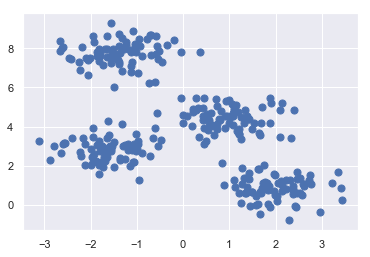

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Intuitively, how would you cluster these points? Are there some points that you might find conflictive? Now use kmeans from sklearn with `n_clusters=4`. And predict the cluster for each point. Then make a scatter plot with the color-coded classes. You may use the 'viridis' cmap.

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

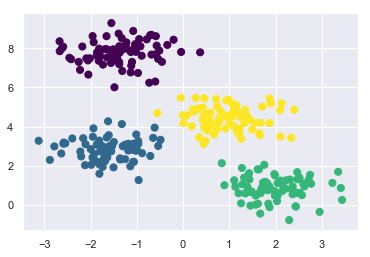

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

The kmeans algorithm computes the centroid for each cluster, that is how it later chooses which class to assign to new points. You can plot the centers by generating another scatter plot with `alpha=0.5` and black color. You should plot the previous scatter plot as well. The centers can be retrieved from sklearn as `.cluster_centers_`

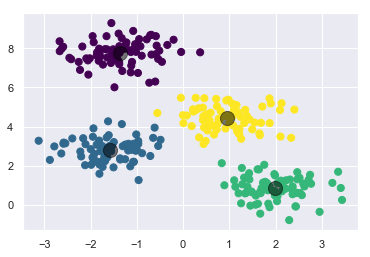

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Would you agree with the clusters found by the kmeans? And the centroids? To obtain a better intuition of how kmeans works, first we need to talk about its optimization procedure. Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
    1. E-Step: assign points to the nearest cluster center
    2. M-Step: set the cluster centers to the mean
    
Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers. In this case, that maximization is accomplished by taking a simple mean of the data in each cluster. The figure below illustrates the steps to train the k-means.

<img src="EM_steps.png">

## K-means initializations
Although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the global best solution. Predict and plot the labels for the generated points. This time initialize the kmeans from sklearn with `n_init=1, init='random'`. What are this parameters doing? Why is that? Try `random_state` between 0 and 4.

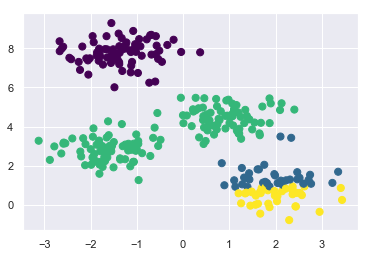

In [6]:
kmeans = KMeans(4, random_state=0, n_init=1, init='random')
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Plot the centroids of the cluster for some random state where the algorithm did not converge to the optimal solution. Set the axis to 'equal' so that it is easier to appreciate the distances.

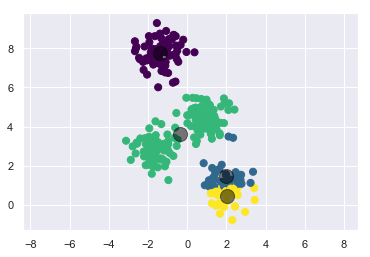

In [7]:
kmeans = KMeans(4, random_state=0, n_init=1, init='random')
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.axis('equal');

## Choosing the appropriate number of clusters
In general, there is no particular rule that allows you to unequivocaly choose the best number of clusters. It will generally depend on the application that you have in mind. However, there are some metrics that can be helpful to evaluate which might be the more appropriate number of clusters. One example could be the `silhouette_score`. That uses the intra cluster distance as well as the distance to the nearest cluster to obtain a normalized score between [-1, 1]. A score of 1 would correspond to perfectly clusterized points. A score of -1 would correspond to a point assigned to the wrong cluster. A score of 0 would correspond to mixed clusters. For more info you may go here: https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

Now import the silhouette_score and compute the average silhouette score for the kmeans result over the previous data_set varying the number of clusters from 2 to 6. Print the results. What are the results? Is this expected?

In [8]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 7):
    labels = KMeans(n_cluster, random_state=0).fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", n_cluster, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5426422297358302
For n_clusters = 3 The average silhouette_score is : 0.5890390393551768
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5923027677672242
For n_clusters = 6 The average silhouette_score is : 0.49934504405927566


In [9]:
labels

array([0, 4, 1, 2, 0, 0, 3, 5, 2, 2, 3, 4, 5, 4, 0, 1, 1, 0, 3, 3, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 1, 2, 4, 5, 4, 4, 4, 4, 4, 3, 0, 1, 3, 1, 5,
       3, 3, 2, 3, 4, 0, 3, 0, 2, 0, 0, 3, 2, 3, 4, 0, 4, 1, 2, 3, 3, 3,
       4, 0, 4, 3, 5, 3, 2, 3, 3, 2, 3, 5, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       4, 4, 1, 0, 4, 3, 3, 5, 0, 0, 1, 3, 2, 0, 2, 0, 1, 0, 0, 5, 4, 1,
       3, 3, 0, 4, 0, 5, 4, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       3, 0, 4, 3, 3, 4, 1, 2, 4, 3, 5, 3, 5, 3, 4, 1, 4, 4, 4, 1, 4, 1,
       0, 3, 2, 3, 0, 1, 4, 1, 1, 0, 1, 3, 3, 1, 0, 5, 5, 2, 0, 5, 3, 2,
       0, 0, 1, 3, 0, 5, 3, 3, 1, 5, 1, 1, 0, 4, 1, 3, 1, 1, 3, 3, 3, 5,
       3, 4, 5, 3, 0, 3, 5, 4, 3, 2, 1, 4, 5, 3, 1, 5, 4, 3, 3, 0, 0, 1,
       4, 0, 0, 3, 0, 3, 1, 2, 2, 5, 1, 2, 1, 0, 3, 1, 0, 3, 2, 3, 0, 1,
       0, 4, 4, 4, 4, 3, 3, 4, 5, 3, 0, 1, 3, 3, 1, 0, 0, 4, 1, 1, 3, 0,
       2, 3, 5, 2, 1, 0, 0, 3, 3, 5, 0, 0, 0, 5, 2, 4, 0, 0, 5, 0, 0, 0,
       4, 3, 2, 1, 0, 0, 4, 2, 2, 0, 0, 1, 2, 3], d

## Kmeans with non-linear cluster boundaries

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. 

Generate two moons (200 points in total) with `noise=.05` and `random_state=0` then, make a scatter plot. How do you think we should split the clusters? Can you visually find the centroids that would separate the clusters correctly?

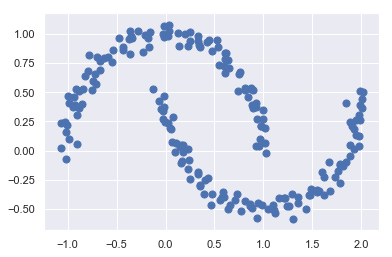

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis');

Run the kmeans algorithm over the data and plot the results. Was this expected? Why?

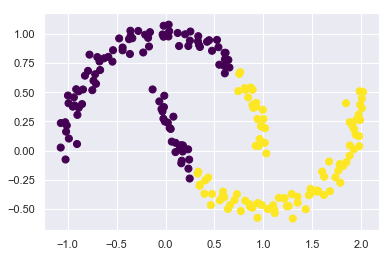

In [11]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## k-means can be slow for large numbers of samples
Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows. You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step. This is the idea behind batch-based k-means algorithms, one form of which is implemented in sklearn.cluster.MiniBatchKMeans. The interface for this is the same as for standard KMeans; we will see an example of its use in the following application.

## Example: k-means for color compression
One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors. The following code will load and plot and image from sklearn.

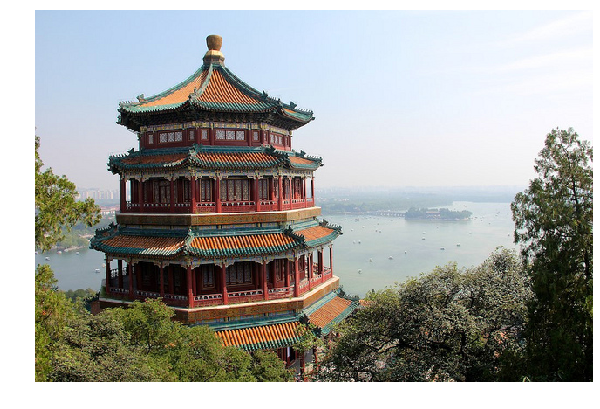

In [12]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.figure(figsize=(10,10))
plt.imshow(china)
plt.axis('off');

Print the image shape, what does each dimension mean?

In [13]:
china.shape

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. Reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1 (hint: typical RGB images have values between 0 and 255). Finally print the shape of the rescaled data.

In [14]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

The following function will create a plot to visualize the pixels in this color space, using a subset of 10,000 pixels for efficiency.

In [17]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Call the function with the data that you have extracted from the image.

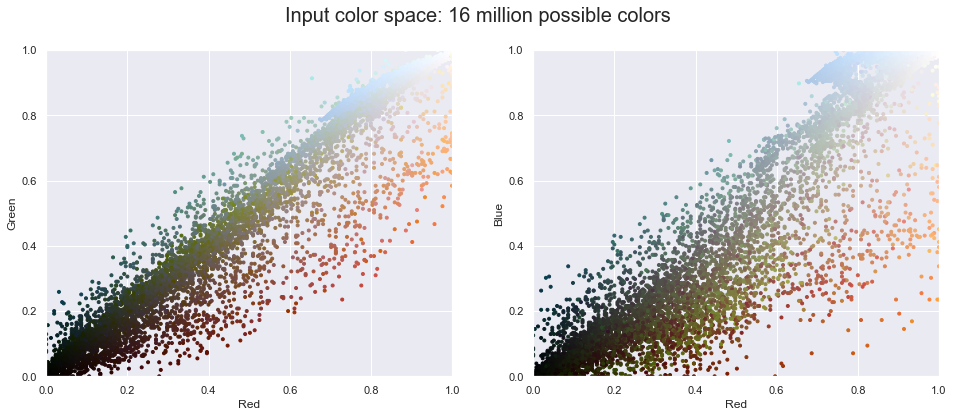

In [18]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm.

Import the `MiniBatchKMeans` from sklearn, fit the data with 16 clusters and obtain the labels for each pixel. Then, assign to each pixel the color corresponding to the centroid of its corresponding cluster.

In [19]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
labels = kmeans.predict(data)
new_colors = kmeans.cluster_centers_[labels]

Finally, plot the pixels again with the new_colors. Compare the plot with the previous one, what do you observe?

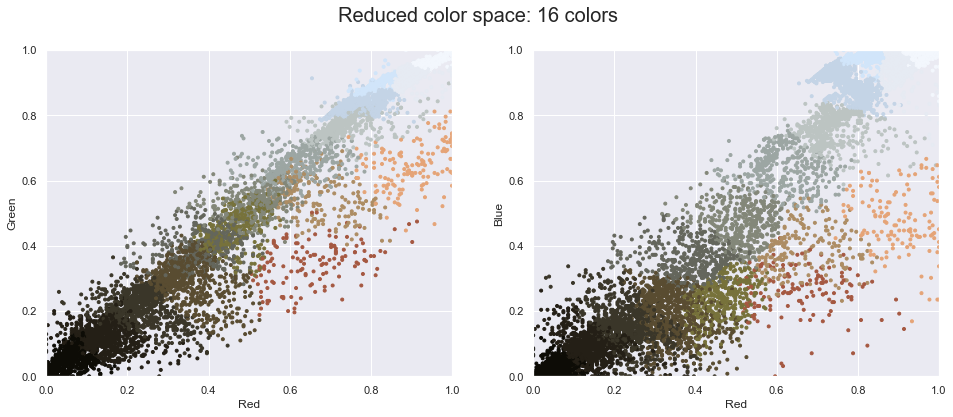

In [20]:
plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

Finally, let us re-create the image with these new colors. First, reshape the new_colors you have found to the shape of the original image. Then plot the original image and the re-colored image side by side. What do you observe? How many possible colors did the original image have? What is the compression factor with the 16 classes we have used?

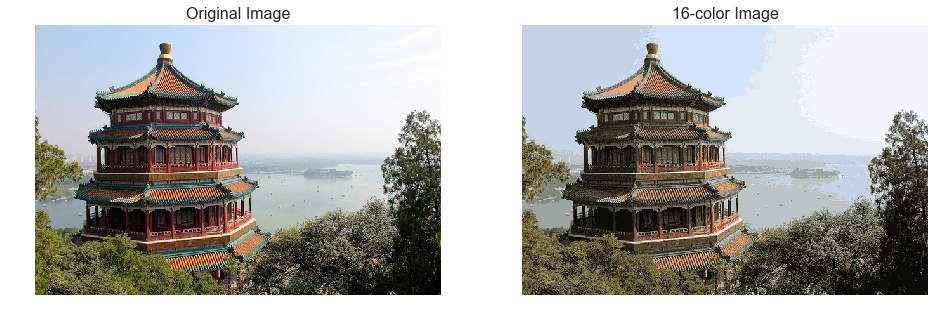

In [21]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(china)
ax[0].axis('off')
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].axis('off')
ax[1].set_title('16-color Image', size=16);

Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable. This image on the right achieves a compression factor of around 1 million! While this is an interesting application of k-means, there are certainly better way to compress information in images. But the example shows the power of thinking outside of the box with unsupervised methods like k-means.